#**Introduccion a la Configuracion de Entornos Virtuales para Ciencia de Datos**

*Angel Enrique Salgado Martinez*

*Elias Buitrago Bolivar*

*S4E*

*ETITC*



In [ ]:
# Instalar el paquete python3-venv
!apt-get update -y
!apt-get install -y python 3.10 -venv

# Crear el ambiente virtual
!python3 -m venv data_sciencie_env

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
apt 2.4.13 (amd64)
Supported modules:
 Ver: Standard .deb
 Pkg:  Debia

In [ ]:
!pip install virtualenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 35.3 MB/s eta 0:00:00


In [ ]:
# Activar el entorno virtual
!source data_sciencie_env/bin/activate

/bin/bash: line 1: data_sciencie_env/bin/activate: No such file or directory


In [ ]:
# Instalar bibliotecas en el entorno virtual
!data_sciencie_env/bin/pip install numpy pandas matplotlib seaborn scikit-learn seaborn plotly bokeh dash

/bin/bash: line 1: data_sciencie_env/bin/pip: No such file or directory


In [ ]:
# Desactivar el entorno virtual
!deactivate

/bin/bash: line 1: deactivate: command not found


In [ ]:
# Eliminar el entorno virtual
!rm -rf data_sciencie_env

In [ ]:
# Archivo requirements.txt
dependencies = """
pandas==2.2.2
numpy==1.26.0
scikit-learn==1.5.2
matplotlib==3.9.2
seaborn==0.13.2
plotly==5.3.1
bokeh==3.4.0
dash==2.18.2
"""

# Crear el archivo requirements.txt
with open('requirements.txt', 'w') as f:
    f.write(dependencies)

print("El archivo 'requirements.txt' ha sido creado correctamente.")


El archivo 'requirements.txt' ha sido creado correctamente.


In [ ]:
!pip install -r requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Cargar el conjunto de datos
url  = "/content/drive/MyDrive/dataset.csv"
data = pd.read_csv(url, encoding='latin1')

# Mostrar las primeras cinco filas
data.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Unnamed: 0          0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
         Unnamed: 0       Quantity      UnitPrice     CustomerID
count  541909.00000  541909.000000  541909.000000  406829.000000
mean   270954.00000       9.552250       4.611114   15287.690570
std    156435.79785     218.081158      96.759853    1713.600303
min         0.00000  -80995.000000  -11062.060000   12346.000000
25%    135477.00000       1.000000       1.250000   13953.000000
50%    270954.00000       3.000000       2.080000   15152.000000
75%    406431.00000      10.000000       4.130000   16791.000000
max    541908.00000   80995.000000   38970.000000   18287.000000


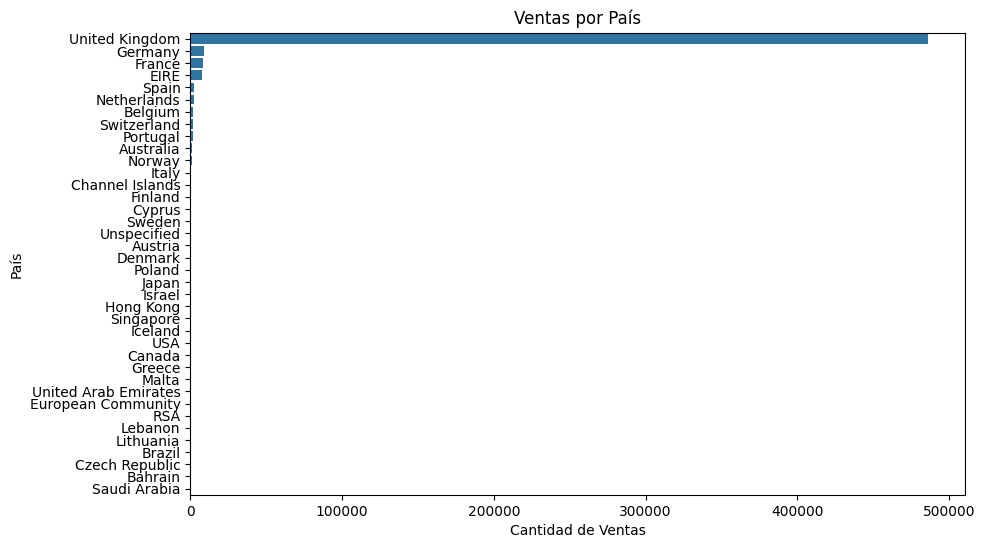

In [ ]:
# Verificar valores faltantes
print(data.isnull().sum())

# Obtener estadisticas resumidas
print(data.describe())

# Filtrar datos para mostrar solo ventas exitosas (sin valores negativos en la cantidad)
data = data[data['Quantity'] > 0]

# Crear un grafico para visualizar las ventas por pais
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=data, order=data['Country'].value_counts().index)
plt.title('Ventas por País')
plt.xlabel('Cantidad de Ventas')
plt.ylabel('País')
plt.show()

**Explicacion de Grafica:**

La gráfica es una gráfica de barras horizontal que muestra la cantidad de ventas por país:

1. Eje horizontal (Cantidad de Ventas): Representa la cantidad de ventas realizadas. Los valores a la derecha indican más ventas.
   
2. Eje vertical (Países): Enumera los diferentes países desde donde se realizaron las compras.

3. Patrón observado:
   - Reino Unido (United Kingdom) domina claramente en ventas, con un número mucho mayor que el de cualquier otro país. Esto se puede observar porque la barra del Reino Unido es significativamente más larga que las de los demás países.
   - Otros países como Alemania, Francia, Irlanda (EIRE) y España tienen ventas, pero en una cantidad mucho menor.
   - La mayoría de los países tienen barras pequeñas o casi imperceptibles, indicando una baja participación en las ventas.

4. Esta distribución sugiere que el mercado principal de la empresa está en el Reino Unido, ya que casi todas las ventas provienen de allí, mientras que los demás países tienen una contribución mucho menor en términos de ventas.



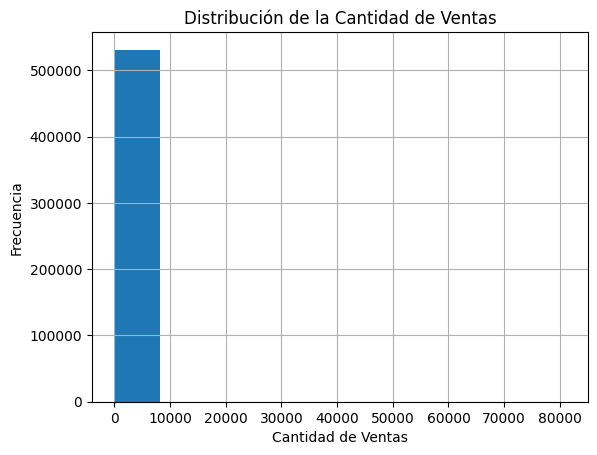

In [ ]:
import matplotlib.pyplot as plt

# Histograma para la cantidad de ventas
data['Quantity'].hist()
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Ventas')
plt.show()

**Explicacion de Grafica:**

La gráfica es un histograma que muestra la distribución de la cantidad de ventas.

- En el eje X (Cantidad de Ventas), se representan los diferentes valores de cantidad de ventas.
- En el eje Y (Frecuencia), se muestra cuántas veces aparece cada rango de cantidad de ventas en los datos.

Interpretación:

La mayoría de las ventas están concentradas en el rango más bajo de la cantidad de ventas, cerca de 0. Esto indica que la mayoría de las transacciones implican pocas unidades vendidas por transacción. Las cantidades de ventas mayores son poco frecuentes o no existen en este conjunto de datos.


In [ ]:
import plotly.express as px

fig = px.scatter(data, x='Quantity', y='UnitPrice', color='Country', title='Ventas por Precio Unitario')
fig.show()

**Explicacion de Grafica:**

Esta gráfica muestra la relación entre la cantidad vendida (eje X) y el precio unitario (eje Y) para diferentes países.

1. Distribución de precios:
- La mayoría de las ventas se concentran en precios unitarios entre 0 y 5,000
- Hay algunos valores atípicos con precios muy altos (cerca de 15,000) y algunos negativos (cerca de -10,000)

2. Cantidad:
- Las cantidades vendidas van desde 0 hasta aproximadamente 80,000 unidades
- La mayoría de las transacciones se concentran en cantidades menores a 10,000 unidades

3. Países:
- La gráfica incluye datos de varios países europeos y otros como Australia y Japón
- Entre los países representados están:
  * Reino Unido
  * Francia
  * Australia
  * Países Bajos
  * Alemania
  * Noruega
  * Suiza
  * España
  * Polonia
  * Portugal
  * Italia
  * Bélgica
  * Lituania
  * Japón
  * Islandia
  * Islas del Canal

4. Patrones:
- Se observa una gran concentración de puntos cerca del origen (bajas cantidades y precios bajos)
- Los precios más altos tienden a corresponder a pedidos de menor cantidad
- Hay relativamente pocas transacciones de gran volumen (más de 40,000 unidades)

Se puede concluir que el negocio maneja principalmente transacciones de volumen moderado a bajo precio, con algunas ventas excepcionales de alto valor unitario pero menor cantidad.


In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p = figure(title='Cantidad de Productos Vendidos por Fecha', x_axis_label='Fecha', y_axis_label='Cantidad de Ventas')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
sales_per_date = data.groupby(data['InvoiceDate'].dt.date)['Quantity'].sum()

p.line(x=sales_per_date.index, y=sales_per_date.values, legend_label='Ventas Diarias', line_width=2)
show(p)

**Explicacion de Grafica:**

Esta gráfica muestra la Cantidad de Productos Vendidos por Fecha con una línea de Ventas Diarias. Elementos clave:

1. Tendencia General:
- Se observa una tendencia ligeramente ascendente a lo largo del tiempo
- La volatilidad (variabilidad) de las ventas parece aumentar en períodos más recientes

2. Picos Notables:
- Hay dos picos muy pronunciados en la serie:
  * Uno aproximadamente en el primer tercio del período
  * Otro hacia el final del período
  * Ambos picos alcanzan aproximadamente 80,000 unidades vendidas

3. Patrón de Ventas:
- El volumen base de ventas parece oscilar entre 5,000 y 40,000 unidades
- Hay una notable variabilidad diaria en las ventas
- Se pueden observar múltiples picos menores que alcanzan alrededor de 40,000 unidades

4. Escala:
- El eje Y muestra la cantidad de ventas, que va desde 0 hasta aproximadamente 90,000 unidades
- El eje X muestra fechas, aunque el formato parece estar en notación científica

5. Observaciones:
- La frecuencia de picos de venta parece aumentar hacia el final del período
- Hay períodos de relativa estabilidad intercalados con períodos de alta volatilidad
- El nivel mínimo de ventas tiende a mantenerse por encima de las 5,000 unidades en la mayoría de los casos
